___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [100]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print('You can safely ignore this.')

You can safely ignore this.


In [101]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [103]:
import tensorflow as tf

In [104]:
SEED = 42
tf.keras.utils.set_random_seed(SEED)
import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"

In [105]:
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [107]:
df.shape

(10000, 14)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [109]:
df.duplicated().sum()

0

In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [111]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [112]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [113]:
df=df.drop(columns=['RowNumber','CustomerId', 'Surname'], axis=0)

In [114]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [115]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

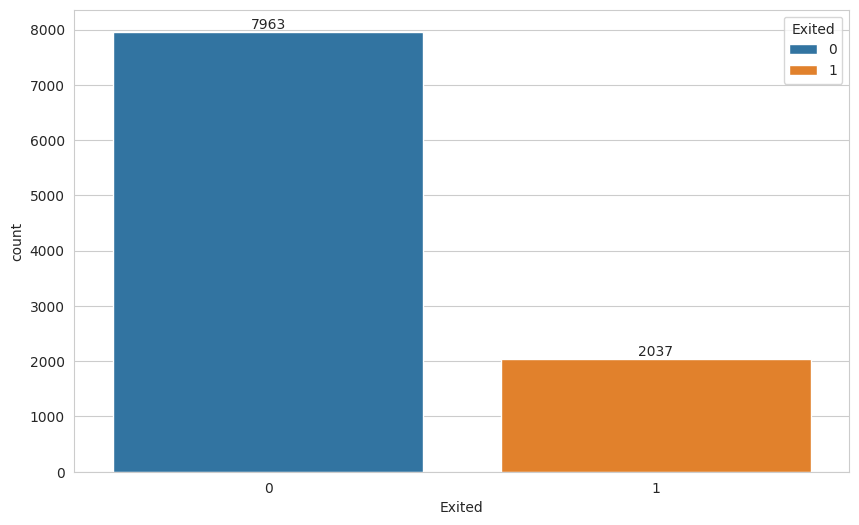

In [116]:
ax=sns.countplot(x=df['Exited'], hue=df['Exited'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

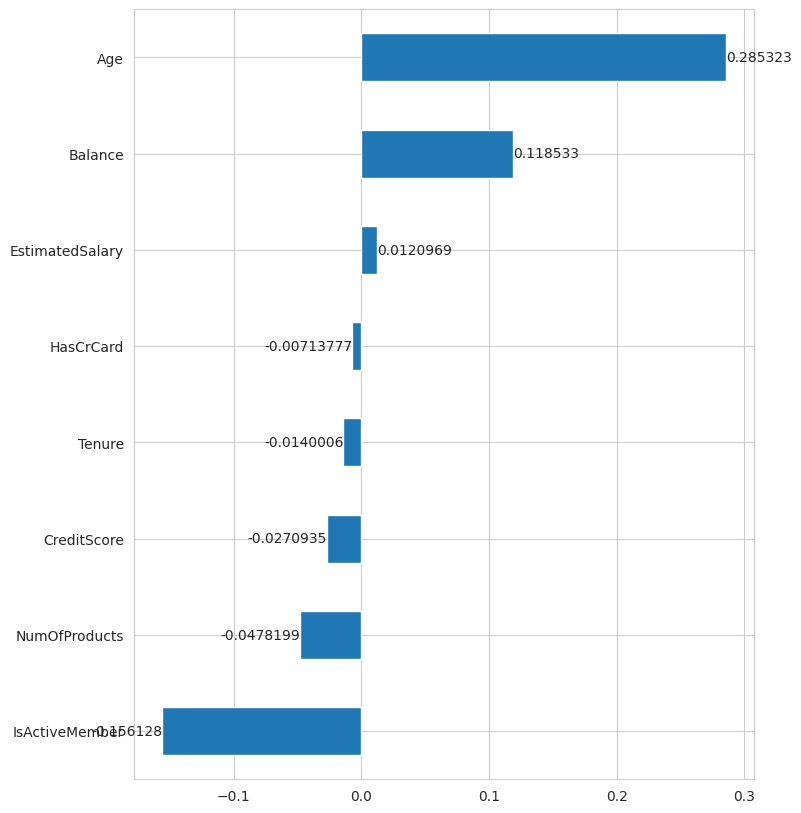

In [117]:
plt.figure(figsize=(8, 10))
ax = df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0])
plt.show()

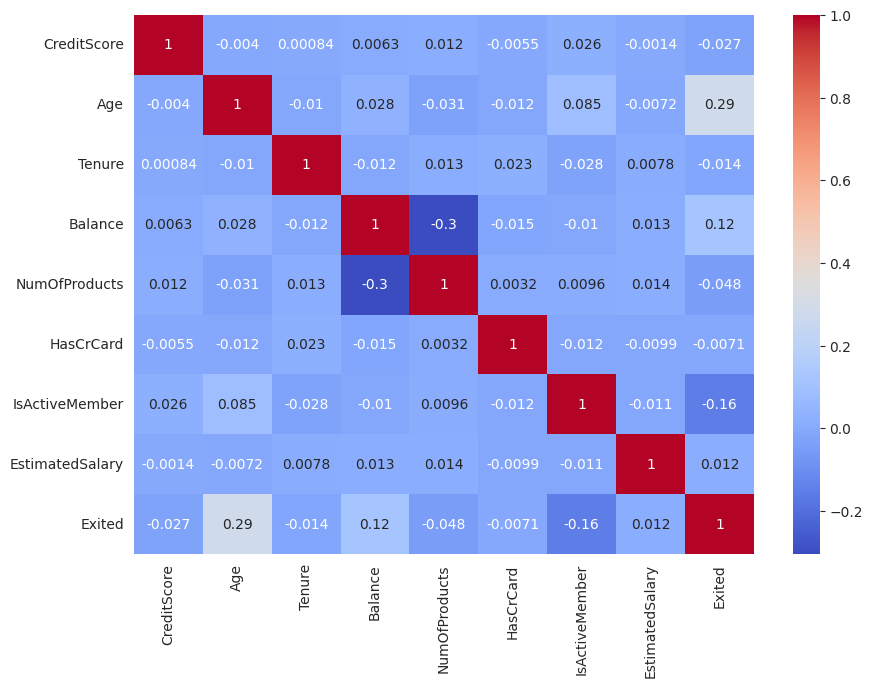

In [118]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="coolwarm");

In [119]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [120]:
df.groupby(df['Geography'])['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

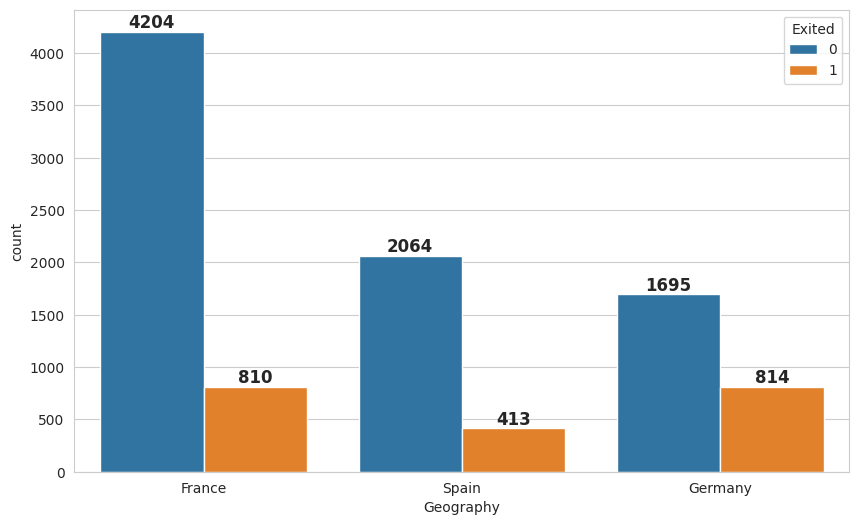

In [121]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Geography', data = df, hue = 'Exited')
ax.bar_label(ax.containers[0], fontsize=12, fontweight="bold")
ax.bar_label(ax.containers[1], fontsize=12, fontweight="bold");

In [122]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [123]:
df.groupby(df['Gender'])['Exited'].value_counts()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4559
        1          898
Name: Exited, dtype: int64

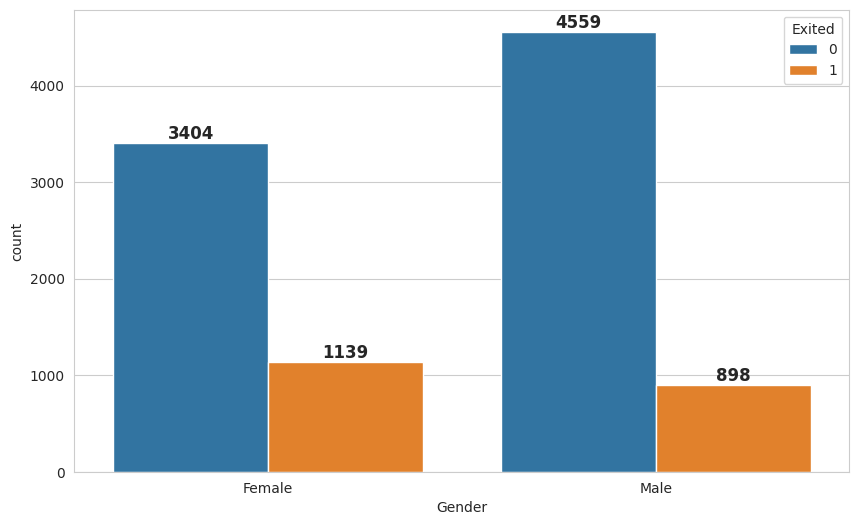

In [124]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Gender', data = df, hue = 'Exited')
ax.bar_label(ax.containers[0], fontsize=12, fontweight="bold")
ax.bar_label(ax.containers[1], fontsize=12, fontweight="bold");

In [125]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [126]:
df.groupby(df['HasCrCard'])['Exited'].value_counts()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: Exited, dtype: int64

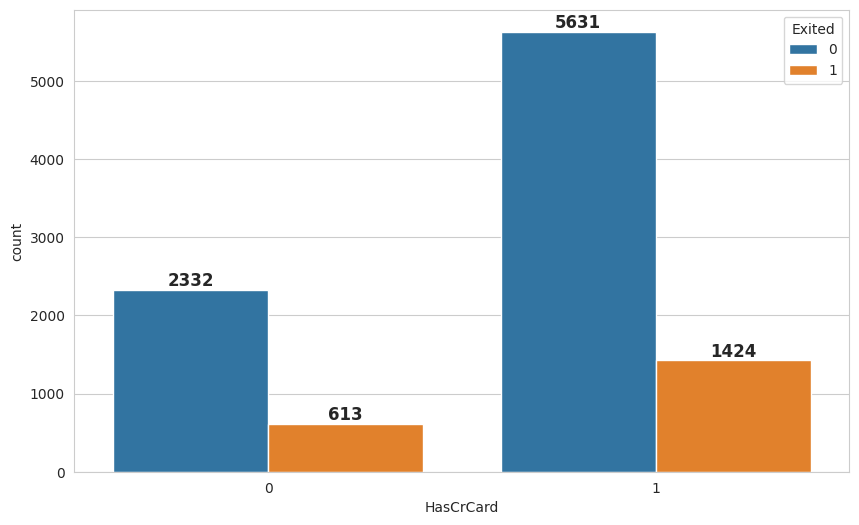

In [127]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='HasCrCard', data = df, hue = 'Exited')
ax.bar_label(ax.containers[0], fontsize=12, fontweight="bold")
ax.bar_label(ax.containers[1], fontsize=12, fontweight="bold");

In [128]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

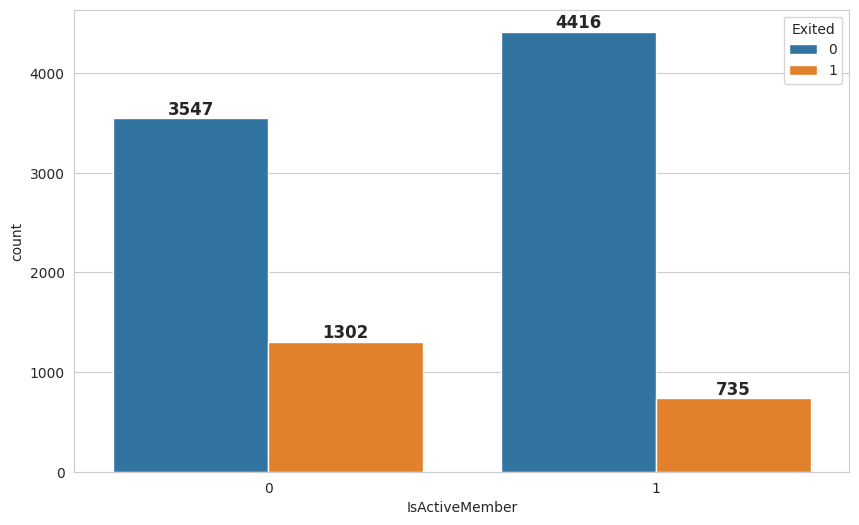

In [129]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='IsActiveMember', data = df, hue = 'Exited')
ax.bar_label(ax.containers[0], fontsize=12, fontweight="bold")
ax.bar_label(ax.containers[1], fontsize=12, fontweight="bold");

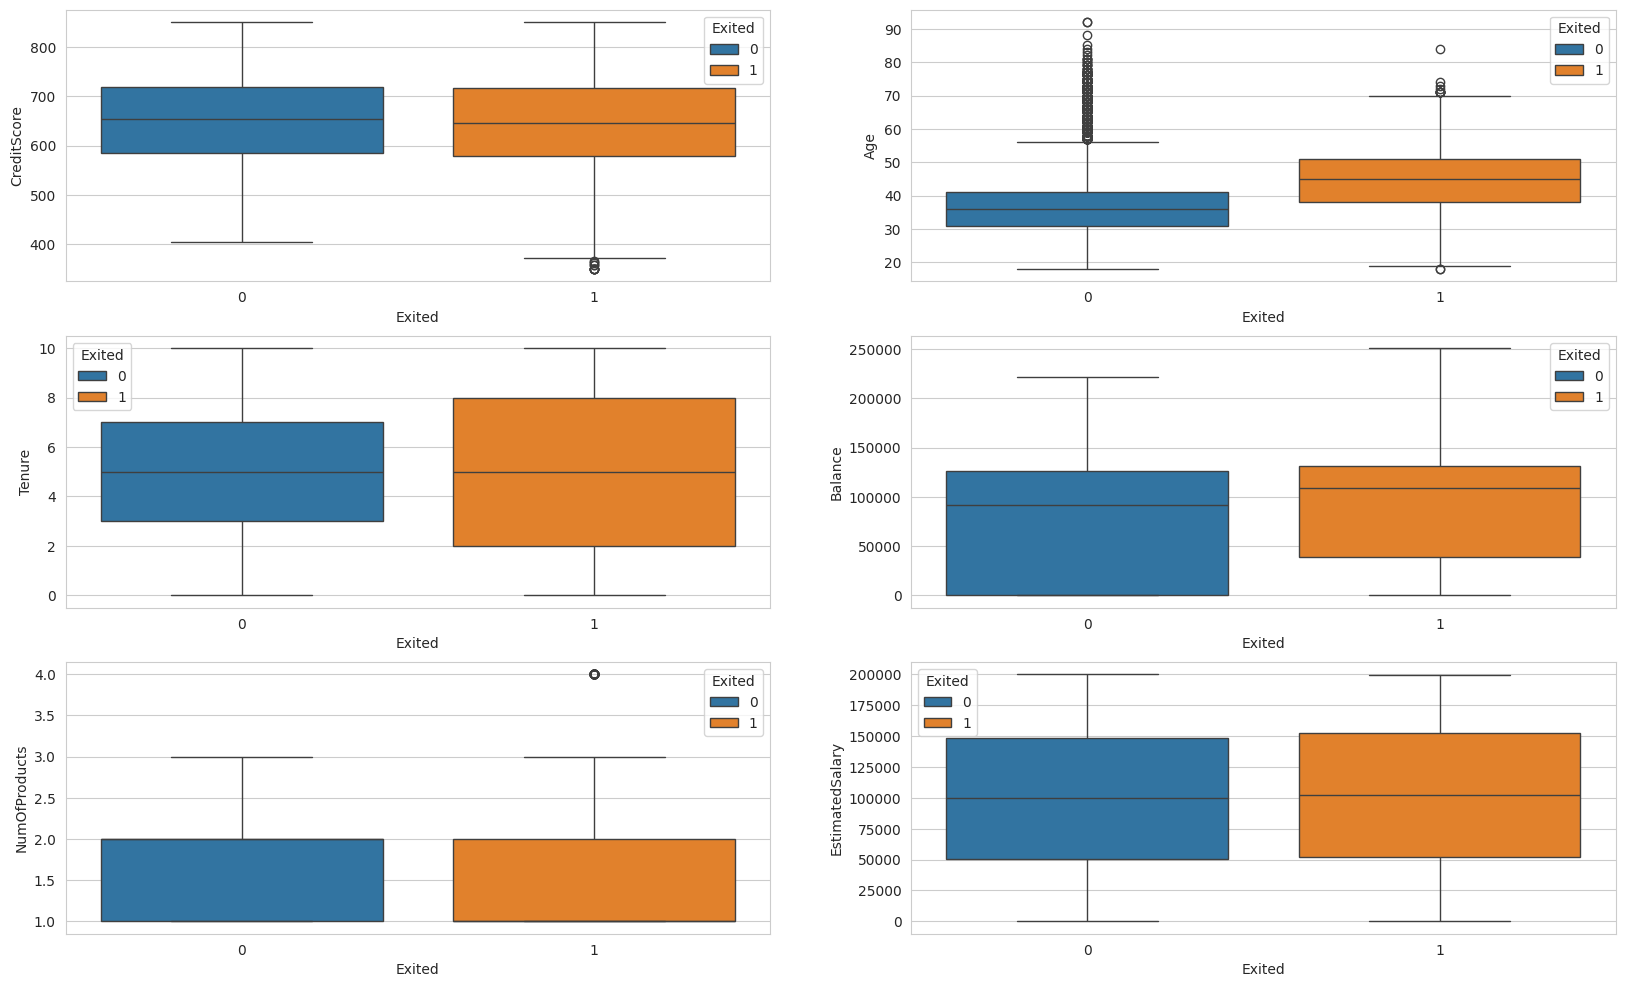

In [130]:
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1]);

# Preprocessing of Data
- Train | Test Split, Scalling

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [132]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [133]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

In [134]:
X_OHE = enc.fit_transform(X[['Geography','Gender']])

In [136]:
X_num=X.select_dtypes(include='number')

In [137]:
X = pd.concat([X_OHE,X_num],axis=1 )

In [138]:
seed = 42

In [139]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,  # X and y are the input features and target labels
    stratify=y,  # Stratify the data to ensure the proportions of classes are the same in each set
    test_size=0.20,  # Specify the proportion of data to be used for testing
    random_state=seed  # Set a random seed to ensure reproducibility
)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,  # X_train and y_train are the remaining training data
    stratify=y_train,  # Stratify the data to ensure the proportions of classes are the same in each set
    test_size=0.20,  # Specify the proportion of data to be used for validation
    random_state=seed  # Set a random seed to ensure reproducibility
)

In [142]:
scaler = MinMaxScaler()

In [143]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [144]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [145]:
batch_size=128

In [146]:
tf.random.set_seed(seed)

# Create a sequential model
model = Sequential()

# Add the first dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))

# Add the second dense layer with 18 units and ReLU activation
model.add(Dense(16, activation="relu"))

# Add the third dense layer with 9 units and ReLU activation
model.add(Dense(8, activation="relu"))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [148]:
model.fit(
    # The training data is provided as x and y, where x is the input data and y is the target output.
    x=X_train,
    y=y_train,

    # The validation data is used to evaluate the model's performance during training.
    validation_data=(X_val, y_val),

    # The batch size determines the number of samples that are processed before the model's weights are updated.
    batch_size=batch_size,

    # The number of epochs specifies how many times the entire training dataset will be passed through the model.
    epochs=300,

    # The verbose parameter controls the amount of information that is printed during training.
    verbose=1
)

Epoch 1/300
50/50 [==============================] - 0s 7ms/step - loss: 0.7020 - accuracy: 0.5325 - val_loss: 0.6793 - val_accuracy: 0.7962
Epoch 2/300
50/50 [==============================] - 0s 5ms/step - loss: 0.6724 - accuracy: 0.7962 - val_loss: 0.6656 - val_accuracy: 0.7962
Epoch 3/300
50/50 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.7962 - val_loss: 0.6395 - val_accuracy: 0.7962
Epoch 4/300
50/50 [==============================] - 0s 5ms/step - loss: 0.5947 - accuracy: 0.7962 - val_loss: 0.5180 - val_accuracy: 0.7962
Epoch 5/300
50/50 [==============================] - 0s 4ms/step - loss: 0.4954 - accuracy: 0.7962 - val_loss: 0.4843 - val_accuracy: 0.7962
Epoch 6/300
50/50 [==============================] - 0s 5ms/step - loss: 0.4791 - accuracy: 0.7962 - val_loss: 0.4745 - val_accuracy: 0.7962
Epoch 7/300
50/50 [==============================] - 0s 5ms/step - loss: 0.4682 - accuracy: 0.7962 - val_loss: 0.4677 - val_accuracy: 0.7962
Epoch 8/300
5

In [149]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [150]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.702,0.533,0.679,0.796
1,0.672,0.796,0.666,0.796
2,0.656,0.796,0.640,0.796
3,0.595,0.796,0.518,0.796
4,0.495,0.796,0.484,0.796


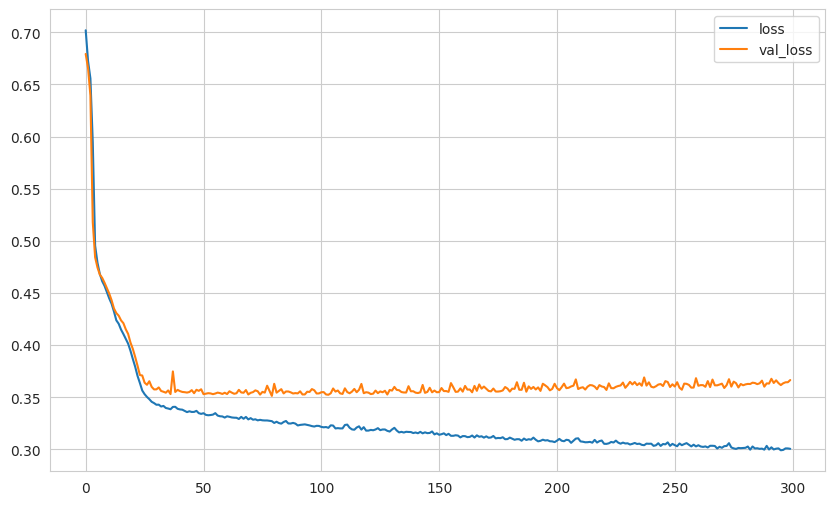

In [151]:
loss_df[["loss","val_loss"]].plot()
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [153]:
model.evaluate(X_test, y_test, verbose=0)

[0.35126209259033203, 0.8544999957084656]

In [154]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.35126209259033203
accuracy:  0.8544999957084656


In [155]:
y_pred = model.predict(X_test, verbose=0)
y_pred

array([[0.01198403],
       [0.0697204 ],
       [0.07546585],
       ...,
       [0.9648106 ],
       [0.00858219],
       [0.12607521]], dtype=float32)

In [156]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1492  101]
 [ 190  217]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1593
           1       0.68      0.53      0.60       407

    accuracy                           0.85      2000
   macro avg       0.78      0.73      0.75      2000
weighted avg       0.85      0.85      0.85      2000



63/63 [==============================] - 1s 6ms/step


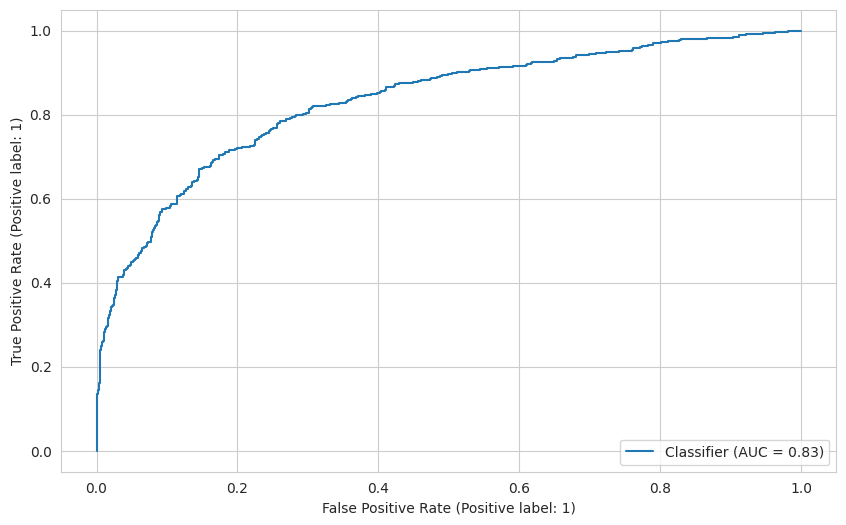

In [167]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [168]:
 roc_auc_score(y_test, y_pred_proba)

0.8323238492730018

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [157]:
tf.random.set_seed(seed)

# Create a sequential model
model = Sequential()

# Add the first dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))

# Add the second dense layer with 18 units and ReLU activation
model.add(Dense(16, activation="relu"))

# Add the third dense layer with 9 units and ReLU activation
model.add(Dense(8, activation="relu"))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [158]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [170]:
model.fit(
    # The training data is provided as x and y, where x is the input data and y is the target output.
    x=X_train,
    y=y_train,

    # The validation data is used to evaluate the model's performance during training.
    validation_data=(X_val, y_val),

    # The batch size determines the number of samples that are processed before the model's weights are updated.
    batch_size=batch_size,

    # The number of epochs specifies how many times the entire training dataset will be passed through the model.
    epochs=300,

    # The verbose parameter controls the amount of information that is printed during training.
    verbose=1,

    class_weight=class_weights
)

Epoch 1/300
50/50 [==============================] - 0s 5ms/step - loss: 0.3849 - accuracy: 0.8211 - val_loss: 0.4561 - val_accuracy: 0.7950
Epoch 2/300
50/50 [==============================] - 0s 4ms/step - loss: 0.3821 - accuracy: 0.8222 - val_loss: 0.4974 - val_accuracy: 0.7638
Epoch 3/300
50/50 [==============================] - 0s 4ms/step - loss: 0.3841 - accuracy: 0.8217 - val_loss: 0.4763 - val_accuracy: 0.7825
Epoch 4/300
50/50 [==============================] - 0s 3ms/step - loss: 0.3835 - accuracy: 0.8217 - val_loss: 0.4853 - val_accuracy: 0.7775
Epoch 5/300
50/50 [==============================] - 0s 4ms/step - loss: 0.3804 - accuracy: 0.8223 - val_loss: 0.4654 - val_accuracy: 0.7887
Epoch 6/300
50/50 [==============================] - 0s 5ms/step - loss: 0.3845 - accuracy: 0.8208 - val_loss: 0.4733 - val_accuracy: 0.7837
Epoch 7/300
50/50 [==============================] - 0s 4ms/step - loss: 0.3810 - accuracy: 0.8180 - val_loss: 0.4685 - val_accuracy: 0.7906
Epoch 8/300
5

In [171]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.385,0.821,0.456,0.795
1,0.382,0.822,0.497,0.764
2,0.384,0.822,0.476,0.783
3,0.383,0.822,0.485,0.777
4,0.380,0.822,0.465,0.789


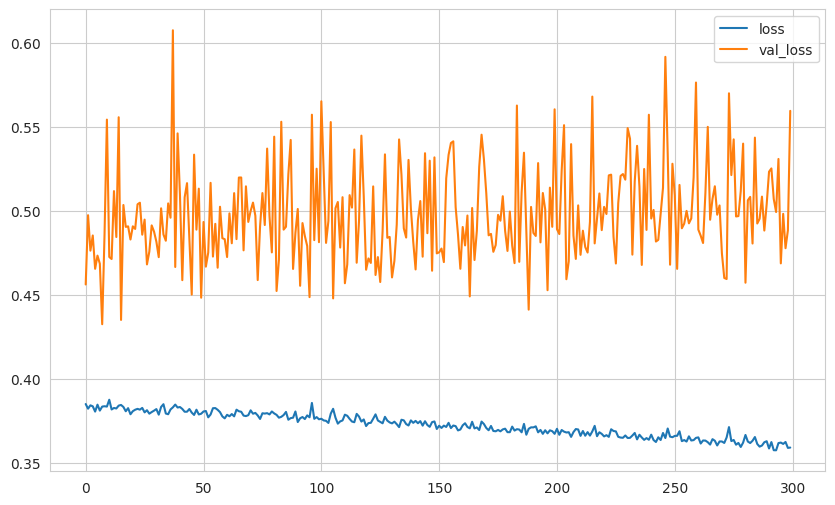

In [172]:
loss_df[["loss","val_loss"]].plot()
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [173]:
model.evaluate(X_test, y_test, verbose=0)

[0.5611979961395264, 0.7350000143051147]

In [176]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.5611979961395264
accuracy:  0.7350000143051147


In [177]:
y_pred = model.predict(X_test, verbose=0)
y_pred

array([[0.08364242],
       [0.04728063],
       [0.11062431],
       ...,
       [0.9965686 ],
       [0.04023653],
       [0.3875535 ]], dtype=float32)

In [178]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1166  427]
 [ 103  304]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1593
           1       0.42      0.75      0.53       407

    accuracy                           0.73      2000
   macro avg       0.67      0.74      0.67      2000
weighted avg       0.82      0.73      0.76      2000



63/63 [==============================] - 0s 1ms/step


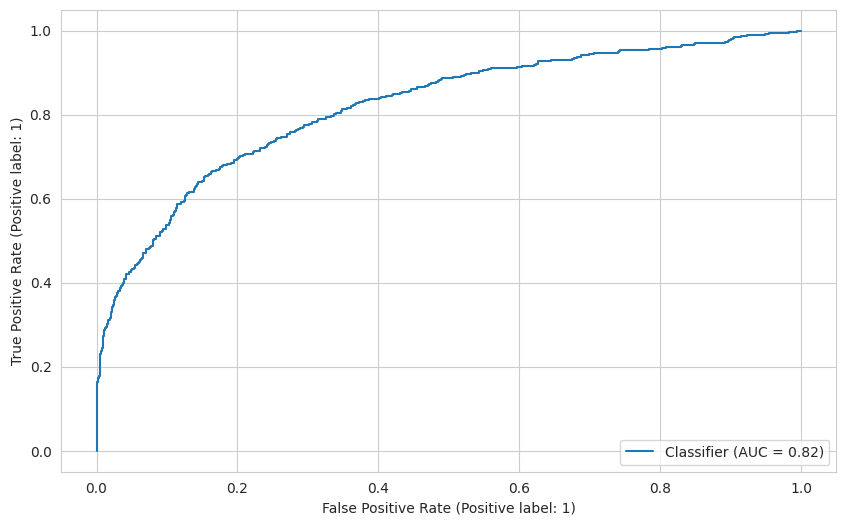

In [179]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [180]:
roc_auc_score(y_test, y_pred_proba)

0.8190023613752426

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [181]:
from tensorflow.keras.optimizers import Adam

In [182]:
tf.random.set_seed(seed)

# Create a sequential model
model = Sequential()

# Add the first dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))

# Add the second dense layer with 18 units and ReLU activation
model.add(Dense(16, activation="relu"))

# Add the third dense layer with 9 units and ReLU activation
model.add(Dense(8, activation="relu"))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Create an Adam optimizer with a learning rate of 0.005
opt = Adam(learning_rate=0.005)

# Compile the model with the optimizer, binary crossentropy loss, and accuracy metric
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [195]:
model.fit(
    # Specify the training data
    x=X_train,
    y=y_train,
    # Specify the validation data
    validation_data=(X_val, y_val),
    # Set the batch size
    batch_size=batch_size,
    # Set the number of epochs to train for
    epochs=300,
    # Set the verbosity level to display training progress
    verbose=1,
    class_weight=class_weights
)

Epoch 1/300
50/50 [==============================] - 1s 8ms/step - loss: 0.6756 - accuracy: 0.7962 - val_loss: 0.4996 - val_accuracy: 0.7962
Epoch 2/300
50/50 [==============================] - 0s 5ms/step - loss: 0.6391 - accuracy: 0.7962 - val_loss: 0.4863 - val_accuracy: 0.7962
Epoch 3/300
50/50 [==============================] - 0s 6ms/step - loss: 0.6278 - accuracy: 0.7962 - val_loss: 0.4926 - val_accuracy: 0.7962
Epoch 4/300
50/50 [==============================] - 0s 9ms/step - loss: 0.6202 - accuracy: 0.7670 - val_loss: 0.5056 - val_accuracy: 0.7531
Epoch 5/300
50/50 [==============================] - 0s 6ms/step - loss: 0.6087 - accuracy: 0.7319 - val_loss: 0.4865 - val_accuracy: 0.7613
Epoch 6/300
50/50 [==============================] - 0s 8ms/step - loss: 0.6009 - accuracy: 0.7208 - val_loss: 0.5107 - val_accuracy: 0.7169
Epoch 7/300
50/50 [==============================] - 0s 7ms/step - loss: 0.6077 - accuracy: 0.6903 - val_loss: 0.5100 - val_accuracy: 0.7225
Epoch 8/300
5

<Axes: >

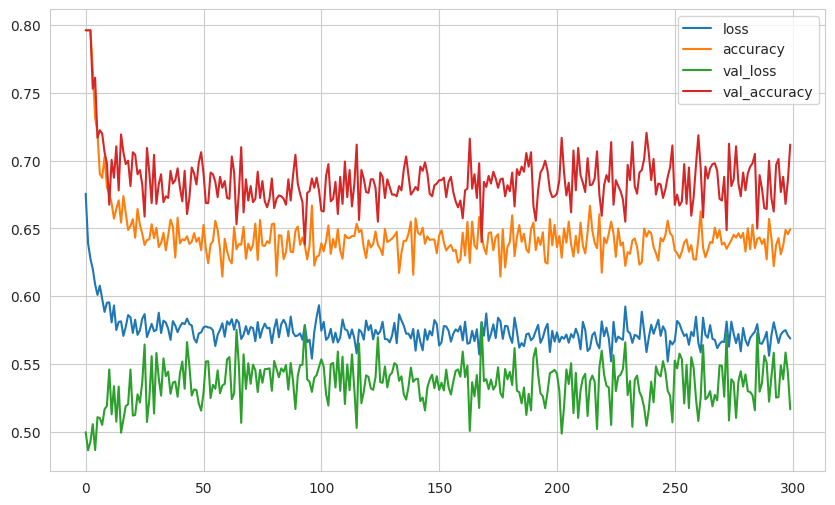

In [196]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [197]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.509448766708374
accuracy:  0.7085000276565552


In [198]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1063  530]
 [  53  354]]
              precision    recall  f1-score   support

           0       0.95      0.67      0.78      1593
           1       0.40      0.87      0.55       407

    accuracy                           0.71      2000
   macro avg       0.68      0.77      0.67      2000
weighted avg       0.84      0.71      0.74      2000



### Add Dropout Layer

In [199]:
from tensorflow.keras.layers import Dropout

In [200]:
# Set the random seed for reproducibility
tf.random.set_seed(seed)

# Create a sequential model
model = Sequential()

# Add the first dense layer with 36 units, ReLU activation, and input dimension equal to the number of features in the training data
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))

# Add a dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Add another dense layer with 18 units and ReLU activation
model.add(Dense(16, activation="relu"))

# Add another dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Add a dense layer with 9 units and ReLU activation
model.add(Dense(8, activation="relu"))

# Add another dropout layer with a dropout rate of 0.5
model.add(Dropout(0.5))

# Add the output layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Define the optimizer (Adam with a learning rate of 0.001) and compile the model with binary cross-entropy loss and accuracy metric
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [201]:
model.fit(
    # Specify the training data
    x=X_train,
    y=y_train,
    # Specify the validation data
    validation_data=(X_val, y_val),
    # Set the batch size
    batch_size=batch_size,
    # Set the number of epochs to train for
    epochs=300,
    # Set the verbosity level to display training progress
    verbose=1,
    class_weight=class_weights
)

Epoch 1/300
50/50 [==============================] - 2s 11ms/step - loss: 0.7289 - accuracy: 0.4528 - val_loss: 0.6918 - val_accuracy: 0.4750
Epoch 2/300
50/50 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.4437 - val_loss: 0.6920 - val_accuracy: 0.4819
Epoch 3/300
50/50 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.4525 - val_loss: 0.6856 - val_accuracy: 0.5813
Epoch 4/300
50/50 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.4708 - val_loss: 0.6854 - val_accuracy: 0.5738
Epoch 5/300
50/50 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.4452 - val_loss: 0.6851 - val_accuracy: 0.5806
Epoch 6/300
50/50 [==============================] - 0s 4ms/step - loss: 0.6870 - accuracy: 0.4597 - val_loss: 0.6783 - val_accuracy: 0.6069
Epoch 7/300
50/50 [==============================] - 0s 4ms/step - loss: 0.6861 - accuracy: 0.4748 - val_loss: 0.6836 - val_accuracy: 0.5562
Epoch 8/300


<Axes: >

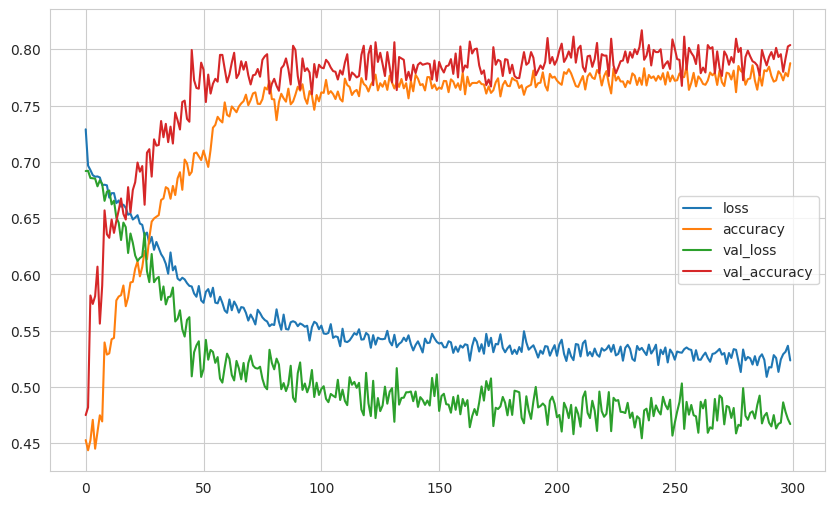

In [202]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [203]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.46917447447776794
accuracy:  0.796999990940094


In [204]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1300  293]
 [ 113  294]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1593
           1       0.50      0.72      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.83      0.80      0.81      2000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [221]:
from tensorflow.keras.callbacks import EarlyStopping

In [232]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [233]:
early_stop = EarlyStopping(
    monitor="val_recall",
    mode="max",
    verbose=1,
    patience=10,
    restore_best_weights=True)

In [234]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [235]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=300,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights)

Epoch 1/300
50/50 [==============================] - 2s 14ms/step - loss: 0.6762 - recall: 0.8183 - val_loss: 0.6944 - val_recall: 0.6350
Epoch 2/300
50/50 [==============================] - 0s 5ms/step - loss: 0.6425 - recall: 0.6810 - val_loss: 0.6413 - val_recall: 0.6166
Epoch 3/300
50/50 [==============================] - 0s 8ms/step - loss: 0.6210 - recall: 0.6503 - val_loss: 0.6393 - val_recall: 0.6472
Epoch 4/300
50/50 [==============================] - 1s 12ms/step - loss: 0.6097 - recall: 0.6917 - val_loss: 0.6191 - val_recall: 0.6687
Epoch 5/300
50/50 [==============================] - 0s 4ms/step - loss: 0.5979 - recall: 0.6925 - val_loss: 0.5997 - val_recall: 0.6595
Epoch 6/300
50/50 [==============================] - 0s 3ms/step - loss: 0.5944 - recall: 0.7032 - val_loss: 0.5501 - val_recall: 0.5706
Epoch 7/300
50/50 [==============================] - 0s 3ms/step - loss: 0.5832 - recall: 0.6994 - val_loss: 0.5813 - val_recall: 0.6626
Epoch 8/300
50/50 [====================

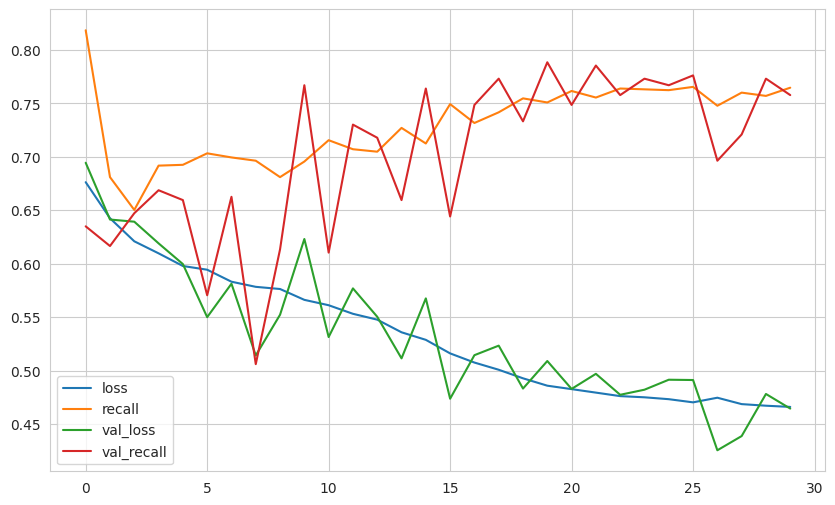

In [236]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [237]:
model.evaluate(X_test, y_test, verbose=0)

[0.5099600553512573, 0.7862407565116882]

In [239]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.5099600553512573
Recall:  0.7862407565116882


In [240]:
y_pred = model.predict(X_test, verbose=0) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1164  429]
 [  87  320]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1593
           1       0.43      0.79      0.55       407

    accuracy                           0.74      2000
   macro avg       0.68      0.76      0.69      2000
weighted avg       0.83      0.74      0.76      2000



#### Monitor the "val_recall" as metric

## Optuna

In [215]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 5.3 MB/s eta 0:00:00


In [228]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [241]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=10, restore_best_weights=True
)

In [242]:
tf.random.set_seed(SEED)
trial_metric = "Recall"

def create_model(trial):
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1.3e-1, log=True)

    # Create a Sequential model
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model  # Return the created model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_float("w0", 0.01, 5)
    w1 = trial.suggest_float("w1", 0.01, 5)

    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=200,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_val, y_val, verbose=0)[1]
    return score

In [243]:
study = optuna.create_study(direction="maximize")

study.optimize(objective, n_trials=10)

study.best_params

[I 2024-04-03 14:12:49,479] A new study created in memory with name: no-name-490d51e7-7b20-472b-aec1-6dc74a543ad2
[I 2024-04-03 14:13:32,329] Trial 0 finished with value: 0.23619632422924042 and parameters: {'n_units1': 48, 'n_units2': 12, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 2.9650993312321456e-05, 'w0': 1.6204178846103598, 'w1': 1.974808225878346}. Best is trial 0 with value: 0.23619632422924042.


Restoring model weights from the end of the best epoch: 27.
Epoch 37: early stopping


[I 2024-04-03 14:13:44,206] Trial 1 finished with value: 0.5766870975494385 and parameters: {'n_units1': 73, 'n_units2': 14, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0010409115512475615, 'w0': 1.8942316501836307, 'w1': 4.638434754079413}. Best is trial 1 with value: 0.5766870975494385.


Restoring model weights from the end of the best epoch: 7.
Epoch 17: early stopping


[I 2024-04-03 14:13:50,955] Trial 2 finished with value: 0.6472392678260803 and parameters: {'n_units1': 44, 'n_units2': 93, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.07576200364806658, 'w0': 1.1301280011895707, 'w1': 3.6187594867608017}. Best is trial 2 with value: 0.6472392678260803.


Restoring model weights from the end of the best epoch: 98.
Epoch 108: early stopping


[I 2024-04-03 14:14:46,759] Trial 3 finished with value: 0.5153374075889587 and parameters: {'n_units1': 16, 'n_units2': 63, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0004275808576833705, 'w0': 2.1316915012017046, 'w1': 4.339698571383475}. Best is trial 2 with value: 0.6472392678260803.
[I 2024-04-03 14:15:28,681] Trial 4 finished with value: 0.08282208442687988 and parameters: {'n_units1': 94, 'n_units2': 81, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 3.3015255311383154e-05, 'w0': 4.555588638687419, 'w1': 2.5452736555666764}. Best is trial 2 with value: 0.6472392678260803.


Restoring model weights from the end of the best epoch: 11.
Epoch 21: early stopping


[I 2024-04-03 14:15:34,850] Trial 5 finished with value: 0.29447853565216064 and parameters: {'n_units1': 128, 'n_units2': 37, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0613215094040257, 'w0': 3.465731838068159, 'w1': 1.6359623960069807}. Best is trial 2 with value: 0.6472392678260803.
[I 2024-04-03 14:16:08,340] Trial 6 finished with value: 0.015337423421442509 and parameters: {'n_units1': 17, 'n_units2': 17, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 2.6169965095538736e-05, 'w0': 3.845828927884431, 'w1': 4.05470865144316}. Best is trial 2 with value: 0.6472392678260803.
[I 2024-04-03 14:16:52,593] Trial 7 finished with value: 0.20552147924900055 and parameters: {'n_units1': 122, 'n_units2': 118, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.5830461286341765e-05, 'w0': 1.1021728935674246, 'w1': 1.299271672290493}. Best is trial 2 with value: 0.6472392678260803.


Restoring model weights from the end of the best epoch: 5.
Epoch 15: early stopping


[I 2024-04-03 14:16:57,013] Trial 8 finished with value: 0.0 and parameters: {'n_units1': 110, 'n_units2': 114, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.020313197030831016, 'w0': 4.378819600492429, 'w1': 1.5658345431980136}. Best is trial 2 with value: 0.6472392678260803.


Restoring model weights from the end of the best epoch: 12.
Epoch 22: early stopping


[I 2024-04-03 14:17:02,627] Trial 9 finished with value: 0.38957056403160095 and parameters: {'n_units1': 67, 'n_units2': 87, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0057084714266429195, 'w0': 4.510559022311203, 'w1': 4.26542301229557}. Best is trial 2 with value: 0.6472392678260803.


{'n_units1': 44,
 'n_units2': 93,
 'optimizer': keras.src.optimizers.nadam.Nadam,
 'learning_rate': 0.07576200364806658,
 'w0': 1.1301280011895707,
 'w1': 3.6187594867608017}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [244]:
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=200,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/200
50/50 [==============================] - 2s 8ms/step - loss: 0.4840 - recall: 0.0422 - val_loss: 0.4495 - val_recall: 0.2147
Epoch 2/200
50/50 [==============================] - 0s 3ms/step - loss: 0.4304 - recall: 0.0905 - val_loss: 0.4304 - val_recall: 0.1933
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.4176 - recall: 0.2431 - val_loss: 0.3855 - val_recall: 0.3620
Epoch 4/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3899 - recall: 0.3413 - val_loss: 0.3744 - val_recall: 0.3190
Epoch 5/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3770 - recall: 0.3773 - val_loss: 0.3699 - val_recall: 0.3988
Epoch 6/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3689 - recall: 0.3965 - val_loss: 0.3680 - val_recall: 0.3221
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - loss: 0.3664 - recall: 0.3919 - val_loss: 0.3720 - val_recall: 0.3221
Epoch 8/200
50/50 [======================

<Axes: >

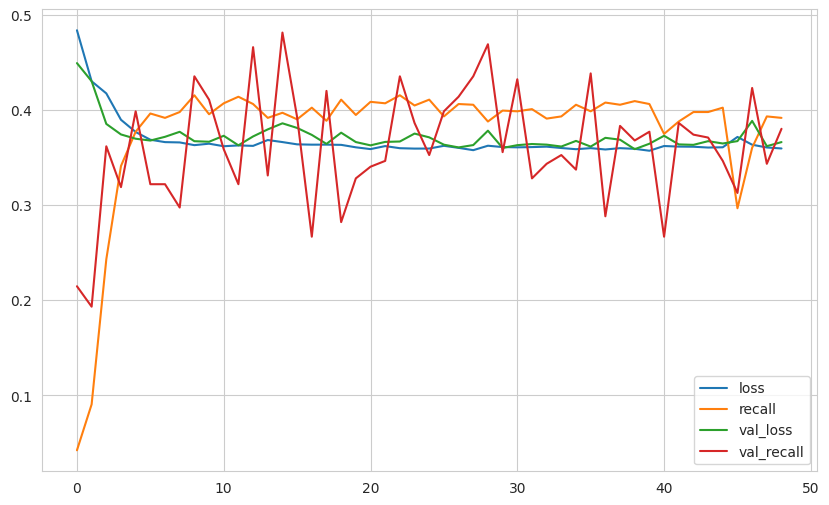

In [247]:
history = model.history.history
loss_df = pd.DataFrame(history)
loss_df.plot()

In [248]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 5ms/step
[[1561   32]
 [ 253  154]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1593
           1       0.83      0.38      0.52       407

    accuracy                           0.86      2000
   macro avg       0.84      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



63/63 [==============================] - 0s 4ms/step


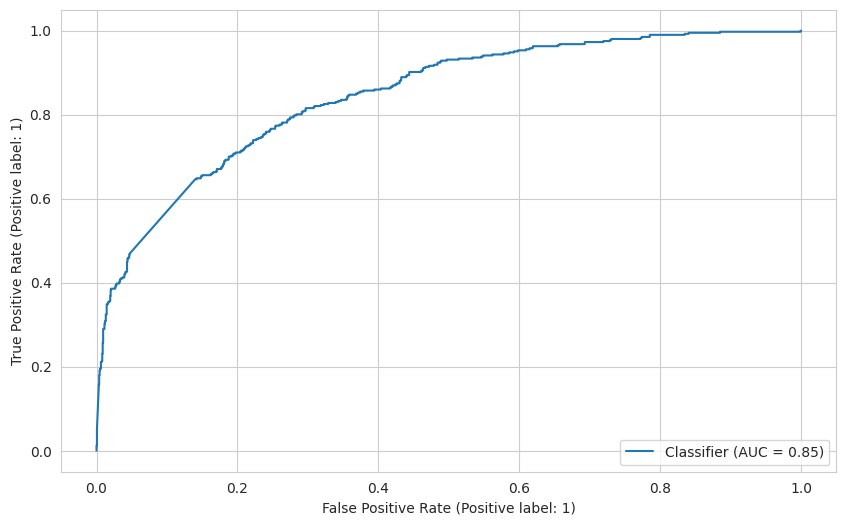

In [249]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [250]:
roc_auc_score(y_test, y_pred_proba)

0.8456977779011677

In [251]:
!pip install scikit-plot

63/63 [==============================] - 1s 7ms/step


IndexError: index 1 is out of bounds for axis 1 with size 1

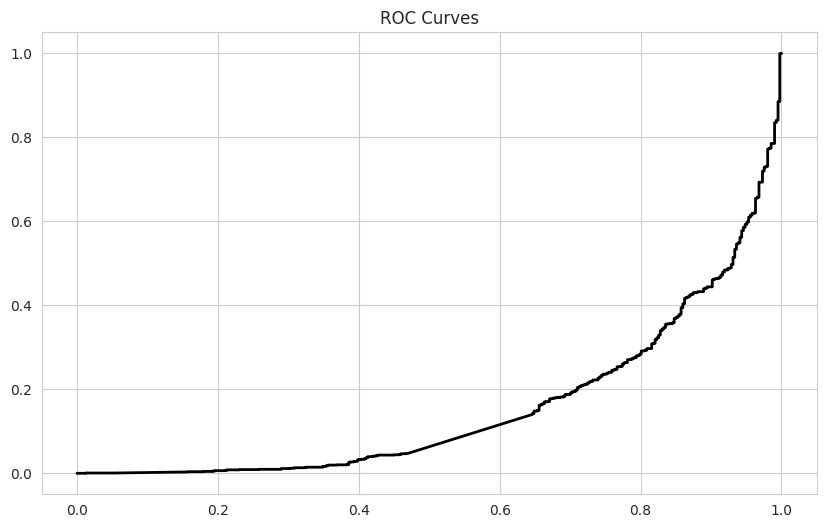

In [252]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_proba = model.predict(X_test)

plot_roc(y_test, y_pred_proba)
plt.show();

# Final Model and Model Deployment

In [253]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20, random_state=SEED
)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [254]:
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=200,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/200
63/63 [==============================] - 3s 11ms/step - loss: 0.4773 - recall: 0.0025 - val_loss: 0.4752 - val_recall: 0.3436
Epoch 2/200
63/63 [==============================] - 0s 6ms/step - loss: 0.4269 - recall: 0.2245 - val_loss: 0.4090 - val_recall: 0.1871
Epoch 3/200
63/63 [==============================] - 0s 6ms/step - loss: 0.3744 - recall: 0.3871 - val_loss: 0.3552 - val_recall: 0.4755
Epoch 4/200
63/63 [==============================] - 0s 7ms/step - loss: 0.3638 - recall: 0.4307 - val_loss: 0.3769 - val_recall: 0.3742
Epoch 5/200
63/63 [==============================] - 0s 7ms/step - loss: 0.3633 - recall: 0.4147 - val_loss: 0.3710 - val_recall: 0.3865
Epoch 6/200
63/63 [==============================] - 0s 7ms/step - loss: 0.3562 - recall: 0.4129 - val_loss: 0.3477 - val_recall: 0.3804
Epoch 7/200
63/63 [==============================] - 0s 5ms/step - loss: 0.3523 - recall: 0.4074 - val_loss: 0.3494 - val_recall: 0.3650
Epoch 8/200
63/63 [=====================

In [255]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1553   40]
 [ 225  182]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.82      0.45      0.58       407

    accuracy                           0.87      2000
   macro avg       0.85      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [256]:
import pickle

pickle.dump(scaler, open("scaler_exited", "wb"))

In [257]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.33645546436309814
Recall:  0.44717445969581604


In [258]:
model.save("model_exited.h5")

In [259]:
from tensorflow.keras.models import load_model

In [260]:
model_exited = load_model("model_exited.h5")
scaler_exited = pickle.load(open("scaler_exited", "rb"))

## Prediction

In [262]:
single_customer = X.iloc[6:7, :]
single_customer

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5,0.000,0.000,1.000,0.000,1.000,645,44,8,113755.780,2,1,0,149756.710


In [268]:
single_customer = scaler_exited.transform(single_customer)
single_customer

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00, -6.98820000e-01,
        -2.38495252e-01,  8.00000000e-02,  2.00173368e-06,
        -2.22222222e-01,  1.00000000e+00,  0.00000000e+00,
        -5.41611866e-05]])

In [269]:
(model_exited.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 31ms/step


array([[0]], dtype=int32)

In [270]:
df["Exited"].iloc[6]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___